In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import pearsonr
import textwrap
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler, StandardScaler  
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,BernoulliNB 
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression 
from sklearn.svm import SVC  
from sklearn.ensemble import GradientBoostingClassifier 

import warnings
warnings.filterwarnings('ignore')
path='C:/Users/Eleonora/Desktop/train_u6lujuX_CVtuZ9i.csv'

df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [4]:
df.describe(include=object).T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [5]:
df.drop('Loan_ID', axis=1, inplace=True)

In [6]:
df.duplicated().any()

False

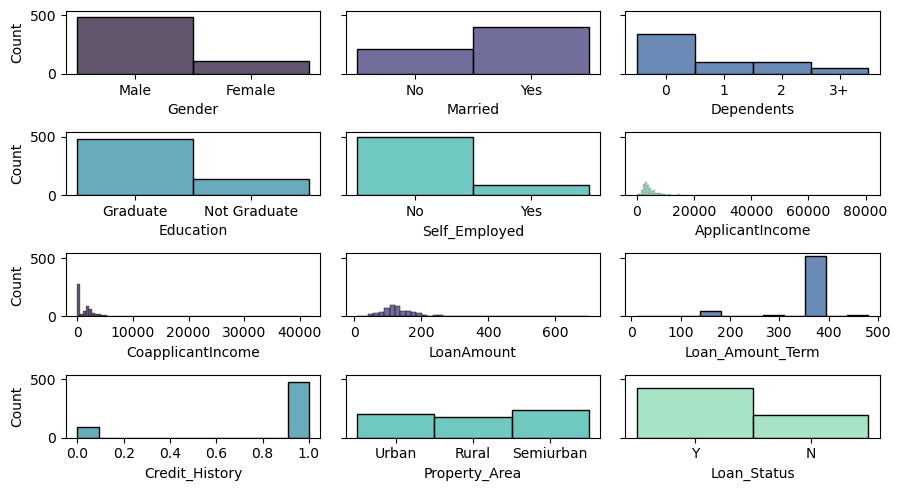

In [7]:
#EDA
ncols = 3
nrows = np.ceil(len(df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(9,5))

for idx, c in enumerate(df.columns):
    row = idx // ncols
    col = idx % ncols
    sns.histplot(df, x=c, ax=axs[row, col],color=sns.color_palette("mako")[idx % len(sns.color_palette("mako"))])
plt.tight_layout()

The Average Income: 5403.46 
Ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


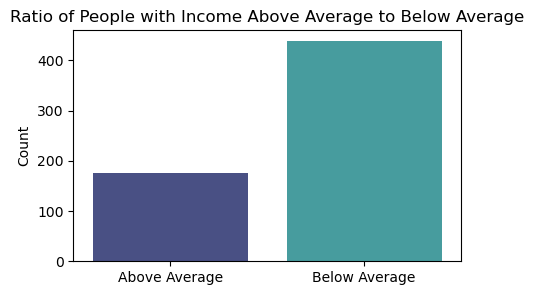

In [8]:
average_income = df['ApplicantIncome'].mean()
print(f"The Average Income: {average_income:.2f} ")

above_average_count = (df['ApplicantIncome'] > average_income).sum()
below_average_count = (df['ApplicantIncome'] <= average_income).sum()

ratio = above_average_count / below_average_count
print(f"Ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

plt.figure(figsize=(5, 3))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="mako")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()



Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


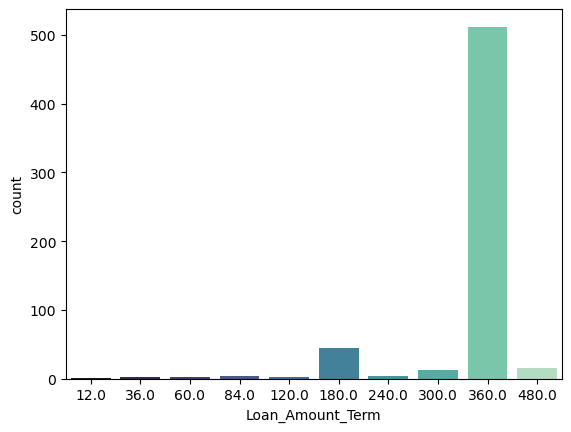

In [9]:
Loan_Amount_TermAnalysis = df.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)
sns.countplot(x="Loan_Amount_Term", data=df, palette="mako")
plt.show()


Loan_Status
Y    422
N    192
Name: count, dtype: int64


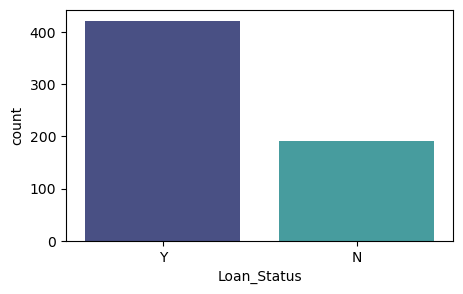

In [10]:
Loan_Status = df.Loan_Status.value_counts(dropna=False)
print(Loan_Status)
plt.figure(figsize=(5, 3))
sns.countplot(x="Loan_Status", data=df, palette="mako")
plt.show()


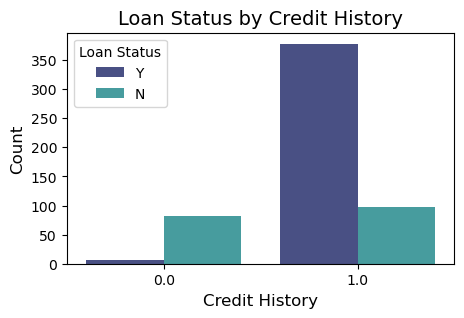

In [11]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Credit History', fontsize=14)
plt.xlabel('Credit History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

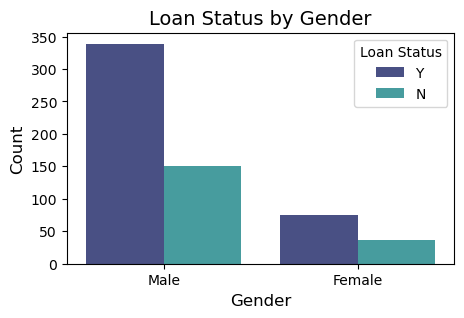

In [12]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

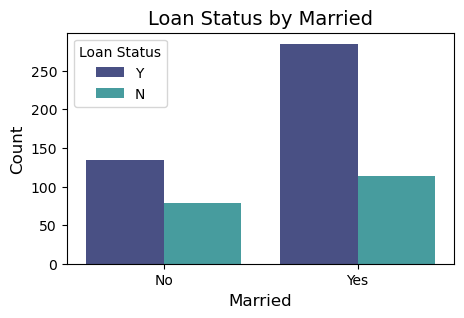

In [13]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Married', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Married', fontsize=14)
plt.xlabel('Married', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

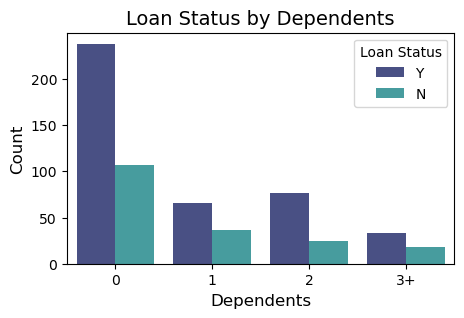

In [14]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Dependents', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Dependents', fontsize=14)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

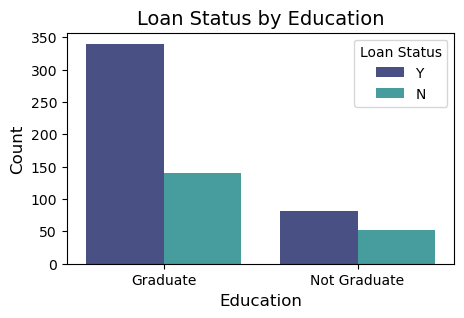

In [15]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Education', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

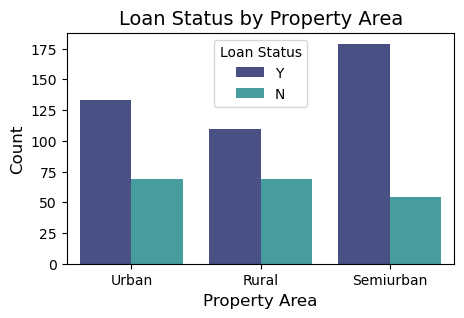

In [16]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Status by Property Area', fontsize=14)
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status')
plt.show()

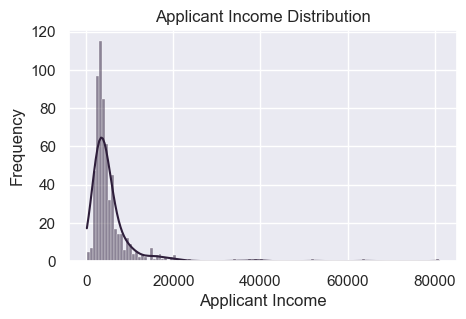

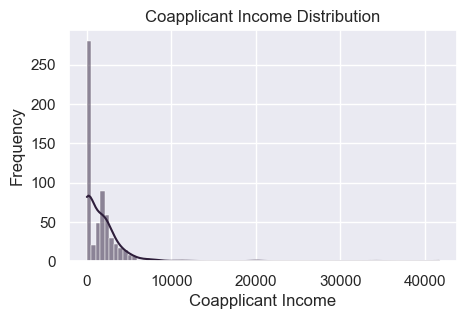

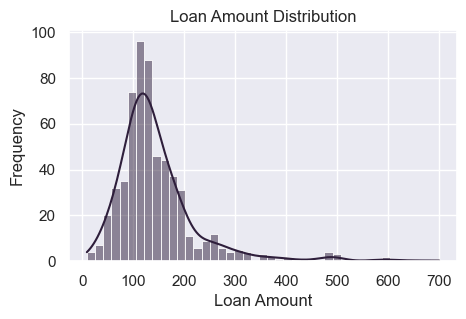

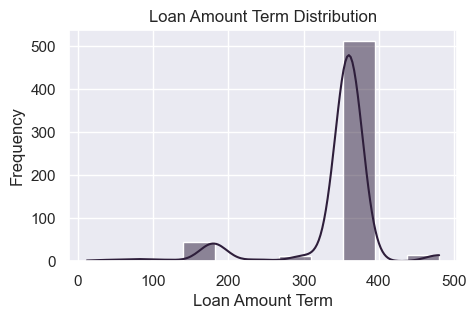

In [17]:

sns.set_theme(palette="mako")


plt.figure(figsize=(5, 3))
sns.histplot(data=df,x="ApplicantIncome", kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="CoapplicantIncome", kde=True)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')


plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="LoanAmount", kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="Loan_Amount_Term", kde=True)
plt.title('Loan Amount Term Distribution')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')


plt.show()


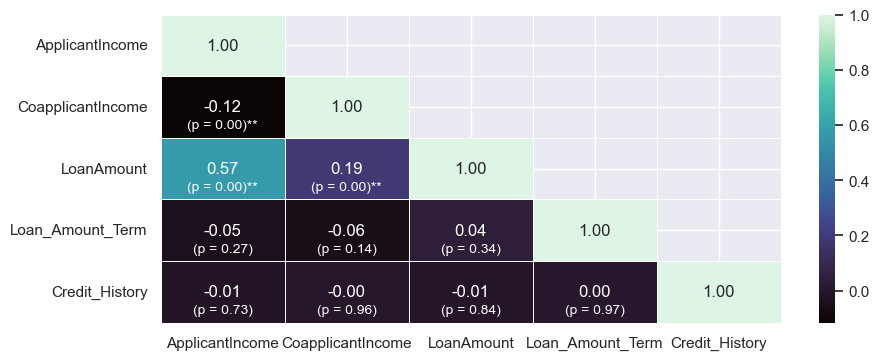

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import textwrap

numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(corr, annot=True, annot_kws={"fontsize": 12}, fmt='.2f', linewidths=0.5, cmap='mako', mask=mask, ax=ax)

p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[1]):
        x = numeric_df.iloc[:, i]
        y = numeric_df.iloc[:, j]
        mask = ~np.logical_or(np.isnan(x), np.isnan(y))
        if np.sum(mask) > 0:
            p_values[i, j] = pearsonr(x[mask], y[mask])[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)


mask_pvalues = np.triu(np.ones_like(p_values), k=1)
for i in range(p_values.shape[0]):
    for j in range(p_values.shape[1]):
        if mask_pvalues[i, j]:
            p_value = p_values.iloc[i, j]
            if not np.isnan(p_value):
                correlation_value = corr.iloc[i, j]
                text_color = 'black'  
                if p_value <= 0.01:
                    ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                            horizontalalignment='center', verticalalignment='center', fontsize=10, color="white")
                elif p_value <= 0.05:
                    ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                            horizontalalignment='center', verticalalignment='center', fontsize=10, color="white")
                else:
                    ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                            horizontalalignment='center', verticalalignment='center', fontsize=10, color="white")

# Adjust labels
x_labels = [textwrap.fill(label.get_text(), 17) for label in ax.get_xticklabels()]
ax.set_xticklabels(x_labels, rotation=0, ha="center")

y_labels = [textwrap.fill(label.get_text(), 20) for label in ax.get_yticklabels()]
ax.set_yticklabels(y_labels, rotation=0, ha="right")

plt.show()


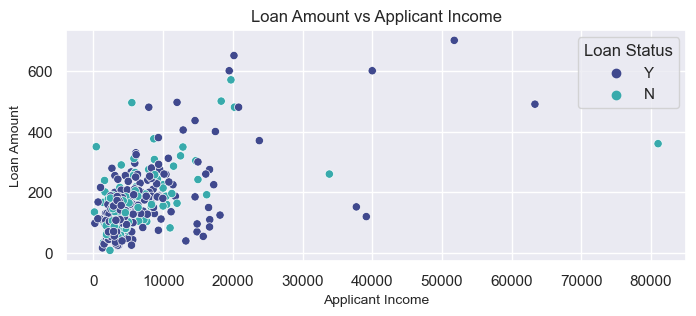

In [19]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, palette='mako')
plt.title('Loan Amount vs Applicant Income', fontsize=12)
plt.xlabel('Applicant Income', fontsize=10)
plt.ylabel('Loan Amount', fontsize=10)
plt.legend(title='Loan Status')
plt.show()

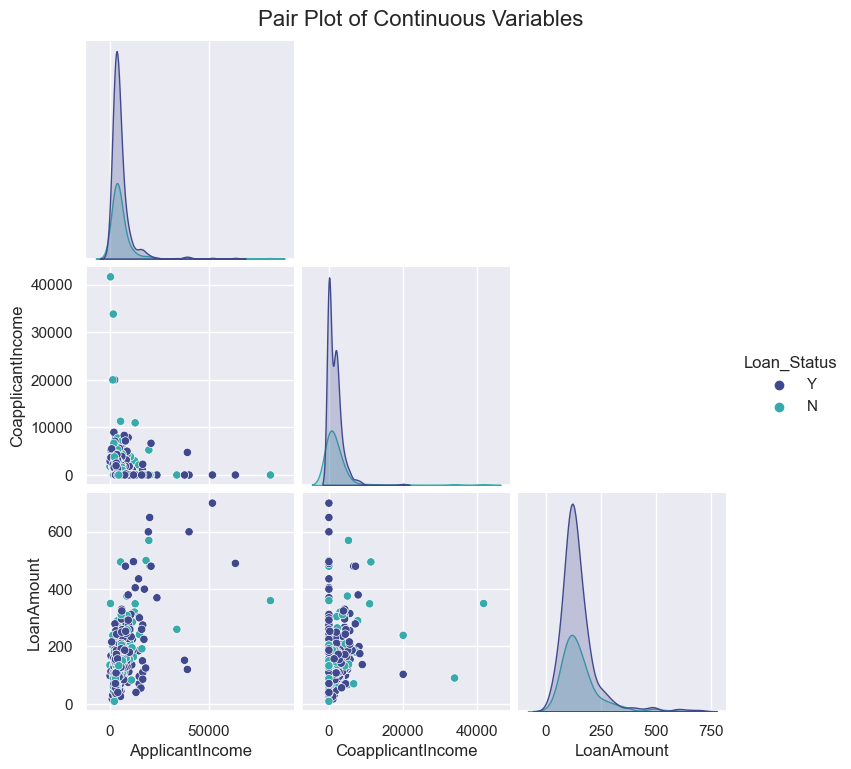

In [20]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], 
             hue='Loan_Status', palette='mako', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Continuous Variables', y=1.02, fontsize=16)
plt.show()

In [21]:
#Cleaning Data
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64


In [22]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [23]:
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [24]:
df = pd.get_dummies(df)
df = df.drop(['Gender_Female', 
                            'Married_No', 
                            'Education_Not Graduate',
                            'Self_Employed_No', 
                            'Loan_Status_N'], axis = 1)

newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_Graduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=newColunmsNames, inplace=True)
column_names = df.columns.tolist()

In [25]:
print(df['Loan_Status'].head())

0     True
1    False
2     True
3     True
4     True
Name: Loan_Status, dtype: bool


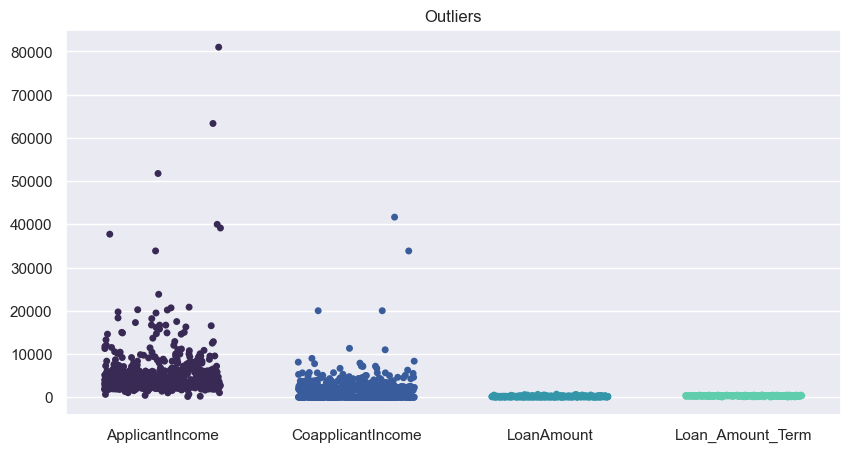

In [26]:
plt.figure(figsize=(10, 5))
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])
sns.stripplot(data=outliersColumns,  palette="mako", jitter=0.3, size=5)
plt.title("Outliers")
plt.show()

In [27]:
Q1 = df.astype(np.float32).quantile(0.25)
Q3 = df.astype(np.float32).quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(136, 17)


In [28]:
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)
print(df.shape)

(136, 17)


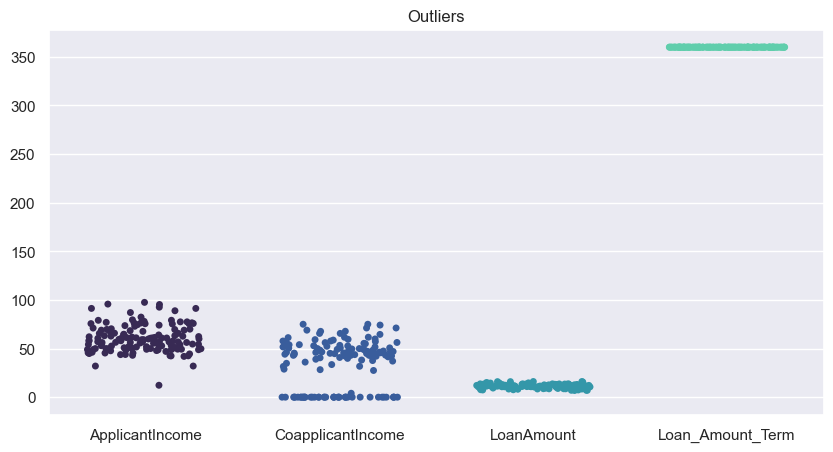

In [29]:
plt.figure(figsize=(10, 5))
outliersColumns = df.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])
sns.stripplot(data=outliersColumns,  palette="mako", jitter=0.3, size=5)
plt.title("Outliers")
plt.show()

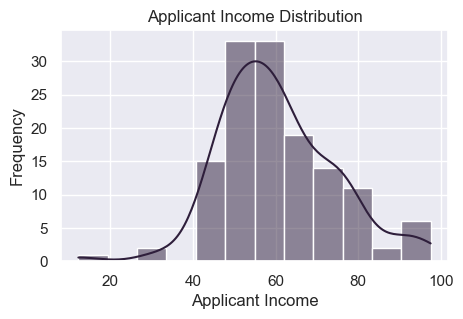

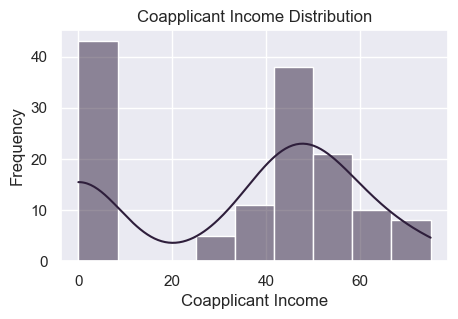

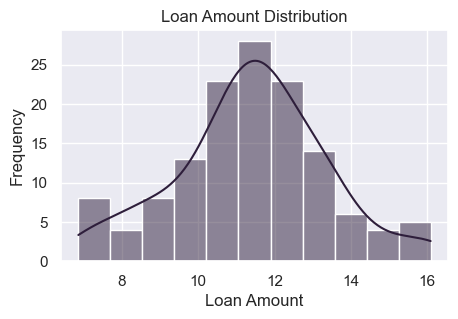

In [30]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df,x="ApplicantIncome", kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="CoapplicantIncome", kde=True)
plt.title('Coapplicant Income Distribution')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')

plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="LoanAmount", kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.show()

In [31]:
#Spliting into Target Feature
X = df.drop(columns=['Loan_Status'])
Y = df['Loan_Status']
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (136, 16)
Shape of Y: (136,)


In [32]:
#Splitting into training testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (108, 16)
Shape of X_test: (28, 16)
Shape of Y_train: (108,)
Shape of Y_test: (28,)


In [33]:
#Decision Tree Classifier 1
scoreListDT_Train = []
scoreListDT_Test = []

for i in range(1, 20):
    for j in range(1, 5):
        M1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)
        M1.fit(X_train, Y_train)
        scoreListDT_Train.append(M1.score(X_train, Y_train))
        scoreListDT_Test.append(M1.score(X_test, Y_test))

DT_Accuracy_Train = max(scoreListDT_Train) 
DT_Accuracy_Test = max(scoreListDT_Test)

print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 96.43%


In [34]:
#Random Forest Classifier 2
scoreListRF_Train = []
scoreListRF_Test = []
for max_dep in range(1, 10):
    for rand_state in range(1, 50):
        for n_est in range(1, 30):
            M2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            M2.fit(X_train, Y_train)
            scoreListRF_Train.append(M2.score(X_train, Y_train))
            scoreListRF_Test.append(M2.score(X_test, Y_test))
RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

Random Forest best accuracy (Training): 100.00%
Random Forest best accuracy (Testing): 96.43%


In [35]:
#Bernoulli Naive Bayes 3
M3= BernoulliNB()
M3.fit(X_train, Y_train)
BNB_Accuracy_Train = M3.score(X_train, Y_train)
BNB_Accuracy_Test = M3.score(X_test, Y_test)
print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

Bernoulli Naive Bayes best accuracy (Training): 79.63%
Bernoulli Naive Bayes best accuracy (Testing): 92.86%


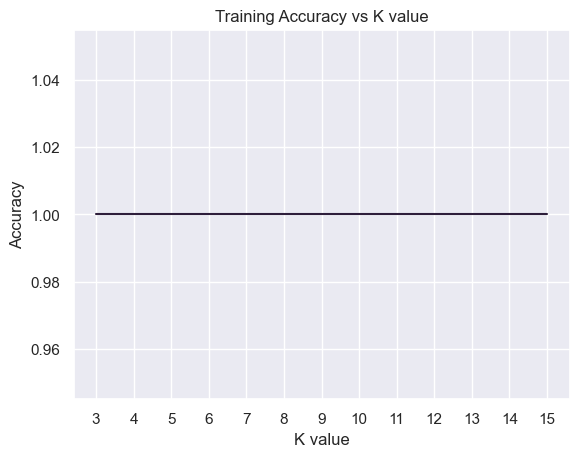

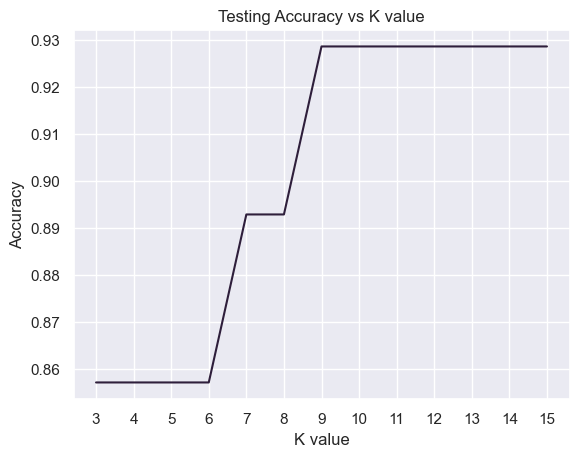

gnb best accuracy (Training): 100.00%
gnb best accuracy (Testing): 92.86%


In [36]:
#Gaussian Naive Bayes 4
scoreListknn_Train = []
scoreListknn_Test = []
for i in range(3, 16):
    M4 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    M4.fit(X_train, Y_train)
    scoreListknn_Train.append(M4.score(X_train, Y_train))
    scoreListknn_Test.append(M4.score(X_test, Y_test))
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()
plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")

plt.show()

gnb_Accuracy_Train = max(scoreListknn_Train) 
gnb_Accuracy_Test = max(scoreListknn_Test)

print(f"gnb best accuracy (Training): {gnb_Accuracy_Train*100:.2f}%")
print(f"gnb best accuracy (Testing): {gnb_Accuracy_Test*100:.2f}%")

In [38]:
#Logistic Regression 5
scoreListLR_Train = []
scoreListLR_Test = []
for i in range(1, 150):
    for j in range(1, 10):
        M5= LogisticRegression(random_state=i, solver='saga', max_iter=j)
        M5.fit(X_train,Y_train)
        scoreListLR_Train.append(M5.score(X_train, Y_train))
        scoreListLR_Test.append(M5.score(X_test, Y_test))
LR_Accuracy_Train = max(scoreListLR_Train) 
LR_Accuracy_Test = max(scoreListLR_Test)
print(f"Logistic Regression best accuracy (Training): {LR_Accuracy_Train*100:.2f}%")
print(f"Logistic Regression best accuracy (Testing): {LR_Accuracy_Test*100:.2f}%")

Logistic Regression best accuracy (Training): 79.63%
Logistic Regression best accuracy (Testing): 92.86%


In [39]:
#Ridge Classifier CV 6
M6= RidgeClassifierCV()
M6.fit(X_train,Y_train)
RCCV_Accuracy_Train = M6.score(X_train, Y_train)
RCCV_Accuracy_Test = M6.score(X_test, Y_test)

print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")

Ridge Classifier CV best accuracy (Training): 79.63%
Ridge Classifier CV best accuracy (Testing): 92.86%


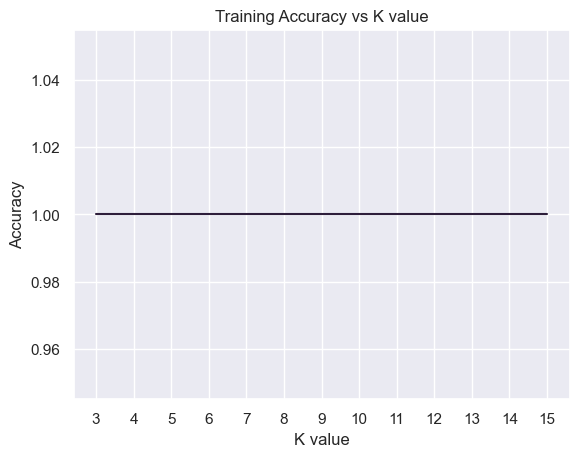

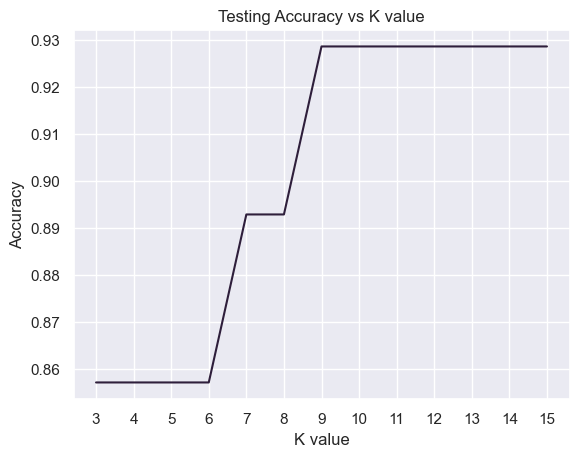

knn best accuracy (Training): 100.00%
knn best accuracy (Testing): 92.86%


In [40]:
#K-Nearest Neighbors 7
scoreListknn_Train = []
scoreListknn_Test = []
for i in range(3, 16):
    M7 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    M7.fit(X_train, Y_train)
    scoreListknn_Train.append(M7.score(X_train, Y_train))
    scoreListknn_Test.append(M7.score(X_test, Y_test))
plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

knn_Accuracy_Train = max(scoreListknn_Train) 
knn_Accuracy_Test = max(scoreListknn_Test)

print(f"knn best accuracy (Training): {knn_Accuracy_Train*100:.2f}%")
print(f"knn best accuracy (Testing): {knn_Accuracy_Test*100:.2f}%")


In [46]:
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-GaussianNB": gnb_Accuracy_Train,
    "Model 5-Logistic Regression": LR_Accuracy_Train,
    "Model 6-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 7-K-Nearest Neighbors (KNN)":knn_Accuracy_Train
}

for model_name, accuracy in sorted(model_train_scores.items(), key=lambda item: item[1], reverse=True):
    print(f"{model_name:<50} Training Score: {accuracy*100:.2f}%")

Model 1-Decision Tree Classifier                   Training Score: 100.00%
Model 2-Random Forest Classifier                   Training Score: 100.00%
Model 4-GaussianNB                                 Training Score: 100.00%
Model 7-K-Nearest Neighbors (KNN)                  Training Score: 100.00%
Model 3-BernoulliNB                                Training Score: 79.63%
Model 5-Logistic Regression                        Training Score: 79.63%
Model 6-Ridge Classifier CV                        Training Score: 79.63%


In [47]:
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-GaussianNB": gnb_Accuracy_Test,
    "Model 5-Logistic Regression": LR_Accuracy_Test,
    "Model 6-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 7-K-Nearest Neighbors (KNN)": knn_Accuracy_Test
}
    
for model_name, accuracy in sorted(model_test_scores.items(), key=lambda item: item[1], reverse=True):
    print(f"{model_name:<50} Testing Score: {accuracy*100:.2f}%")

Model 1-Decision Tree Classifier                   Testing Score: 96.43%
Model 2-Random Forest Classifier                   Testing Score: 96.43%
Model 3-BernoulliNB                                Testing Score: 92.86%
Model 4-GaussianNB                                 Testing Score: 92.86%
Model 5-Logistic Regression                        Testing Score: 92.86%
Model 6-Ridge Classifier CV                        Testing Score: 92.86%
Model 7-K-Nearest Neighbors (KNN)                  Testing Score: 92.86%


In [45]:
import pickle
filename = 'model.pkl'
pickle.dump(M2, open(filename, 'wb'))